In [1]:
# Carregar bibliotecas
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import requests
import json

# Carregar o dataset MNIST
digits = datasets.load_digits(n_class=10)

images = digits.images
targets = digits.target

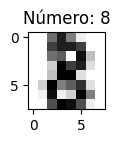

In [2]:
# Selecione a imagem que deseja inferir
index = 8

# Mostrar a imagem de um número
plt.figure(figsize=(1, 1)) 
plt.imshow(images[index], cmap='binary', interpolation='nearest')
plt.title('Número: {}'.format(targets[index]))
plt.show()

# Converter a imagem em uma lista
input_data =  images[index].reshape(-1).tolist()

In [3]:
# Definir a URL do endpoint
url = "http://localhost:8000/predict"

# Converter os dados para o formato JSON
input_json = json.dumps({"input": input_data})

# Enviar a solicitação POST para o servidor FastAPI
response = requests.post(url, data=input_json, headers={"Content-Type": "application/json"})

# Verificar o status da resposta
if response.status_code == 200:
    prediction = response.json().get("prediction")
    print(f"Previsão do modelo: {prediction}")
else:
    print(f"Erro: {response.status_code}")
    print(f"Detalhes: {response.text}")


Previsão do modelo: [8]
